# Regression with regularization

#### We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

### Import libraries and dataset from sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add Noise to original dataset

In [3]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.356317,0.708923,0.425275,0.325695,0.352195
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.739617,0.546491,0.745309,0.447749,0.817836
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.315105,0.643628,0.591244,0.194199,0.864168
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.581437,0.660272,0.275374,0.292657,0.253777
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.342754,0.793230,0.464166,0.311400,0.576501


In [5]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) and describe how the scores of the features change

My references:
https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5



In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# CREATE MODEL INSTANCES

# PUT YOUR CODE HERE
linmod=LinearRegression()
lasso=Lasso()
ridge=Ridge()
elastic_net=ElasticNet()

##### NORMALIZE DATA USING THE ```StandardScaler``` PROVIDED BY sklearn

In [8]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [10]:
linmod.fit(X_train,y_train)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Noise_1', 'Noise_2', 'Noise_3', 'Noise_4',
       'Noise_5'],
      dtype='object')

In [30]:
lista=[linmod,lasso,ridge,elastic_net]

lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.34071853, -0.        ,
        3.07516345, -0.        , -0.        , -0.        , -0.        ,
       -1.23189664,  0.1720069 , -3.48067367,  0.        , -0.        ,
        0.        , -0.        , -0.        ])

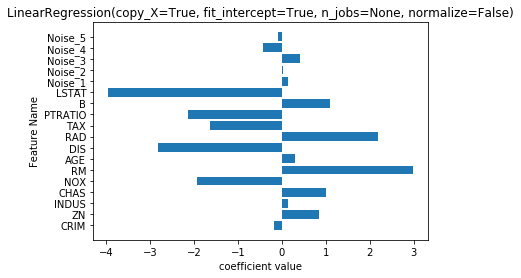

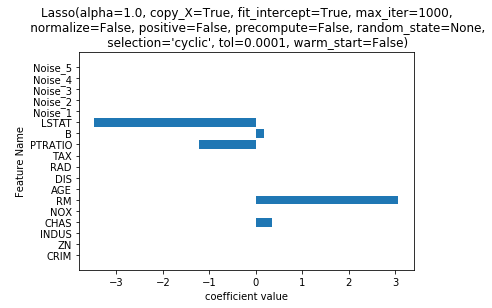

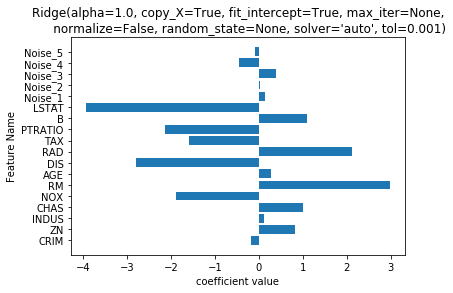

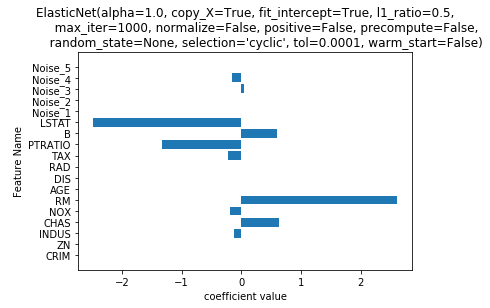

In [33]:
for item in lista:
    fig, ax = plt.subplots()
    ax.barh(X.columns, item.coef_)
    ax.set_title(item)
    ax.set_xlabel('coefficient value')
    ax.set_ylabel('Feature Name')

In [47]:
pd.DataFrame(list(zip(X.columns,linmod.coef_,lasso.coef_,ridge.coef_,elastic_net.coef_)),columns=['Features','linereg','lasso','ridge','elastic_net']).set_index('Features')

,linereg,lasso,ridge,elastic_net
Features,,,,
CRIM,-0.172375,-0.000000,-0.164952,-0.000000
ZN,0.851367,0.000000,0.834568,0.000000
INDUS,0.146531,-0.000000,0.122175,-0.121473
CHAS,0.997243,0.340719,1.000236,0.626249
NOX,-1.929928,-0.000000,-1.892897,-0.192278
RM,2.979061,3.075163,2.990465,2.612643
AGE,0.298176,-0.000000,0.285334,-0.000000
DIS,-2.820998,-0.000000,-2.790406,-0.012270
RAD,2.194399,-0.000000,2.116369,-0.000000


#### Decribe the results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Compute the Model Scores

In [52]:
lista=[linmod,lasso,ridge,elastic_net]
lista2=['linmod','lasso','ridge','elastic_net']

for item,name in zip(lista,lista2):
    y_pred=item.predict(X_test)
    print(f'Mean Squared Error of {name}:',(mean_squared_error(y_test,y_pred)).round(2))

Mean Squared Error of linmod: 23.46
Mean Squared Error of lasso: 24.91
Mean Squared Error of ridge: 23.47
Mean Squared Error of elastic_net: 24.61


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

### Alpha parameter:  Apply Lasso with different values of alpha and describe how the parameters scores change


- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [54]:
names = names = X.columns

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,

        # ********************************************************
        lasso = Lasso(alpha)# PUT YOUR CODE HERE  ********************************************************
        # ********************************************************
        
        # Fit the lasso regression
        lasso.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the dataframe  
    return df

In [55]:
lasso([0, .0001, .5, 10])

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5477.4017329297485, tolerance: 4.2716295415019765
  positive)


,Feature Name,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.898523,-0.898247,-0.114335,-0.0
1,ZN,1.136874,1.136351,0.000000,0.0
2,INDUS,0.073283,0.072343,-0.000000,-0.0
3,CHAS,0.660892,0.660932,0.395425,0.0
4,NOX,-1.965945,-1.965122,-0.000000,-0.0
5,RM,2.672735,2.672920,2.974684,0.0
6,AGE,0.017392,0.016958,-0.000000,-0.0
7,DIS,-3.141267,-3.140860,-0.170469,0.0
8,RAD,2.582482,2.580612,-0.000000,-0.0
9,TAX,-2.069431,-2.067588,-0.000000,-0.0


#### Describe the above results

Alpha is the parameter that gives weight to the penalization term in the Loss fucntion, so when alpha increase, parameters tend to cero to minimize the loss fuction. Alpha 0, means a linear regression without penalization (so it is only seeking for the best OLS), and as the alpha increase parameters goes to cero. 

### Apply Ridge with different values of alpha and describe how the parameters scores change
- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [56]:
names = names = X.columns

# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        
        #********************************************************
        ridge = Ridge(alpha)# PUT YOUR CODE HERE  ********************************************************
        #********************************************************
        
        # Fit the lasso regression
        ridge.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the dataframe  
    return df

In [57]:
ridge([0, .00001, .5, 10])

,Feature Name,Alpha = 0.000000,Alpha = 0.000010,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.898523,-0.898523,-0.894314,-0.829368
1,ZN,1.136874,1.136874,1.128946,1.005461
2,INDUS,0.073283,0.073282,0.061532,-0.104005
3,CHAS,0.660892,0.660892,0.662570,0.686204
4,NOX,-1.965945,-1.965944,-1.952408,-1.730013
5,RM,2.672735,2.672736,2.676999,2.739635
6,AGE,0.017392,0.017392,0.014525,-0.028701
7,DIS,-3.141267,-3.141267,-3.127528,-2.888230
8,RAD,2.582482,2.582482,2.546832,2.023789
9,TAX,-2.069431,-2.069430,-2.035774,-1.560184


In [12]:
ridge([0, .00001, .5, 10])

,Feature Name,Alpha = 0.000000,Alpha = 0.000010,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.994599,-0.994599,-0.989897,-0.916786
1,ZN,1.082065,1.082064,1.074406,0.955335
2,INDUS,0.194093,0.194093,0.181704,0.004660
3,CHAS,0.703614,0.703614,0.705335,0.729298
4,NOX,-2.163796,-2.163795,-2.148827,-1.902499
5,RM,2.681363,2.681363,2.685717,2.749827
6,AGE,0.032287,0.032287,0.029008,-0.021010
7,DIS,-3.132136,-3.132136,-3.118357,-2.878709
8,RAD,2.661499,2.661498,2.625118,2.090145
9,TAX,-2.067622,-2.067621,-2.033730,-1.554169


In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [58]:
from sklearn.linear_model import LassoCV

reg = LassoCV(max_iter = 5000, cv = 20, normalize=True).fit(X_train, y_train)
reg.alpha_

0.0038292618915937125

In [13]:
from sklearn.linear_model import LassoCV

reg = LassoCV(max_iter = 5000, cv = 20, normalize=True).fit(X_train, y_train)
reg.alpha_

0.0035711824561926626

# Conclusions:
The bias-variance tradeoff is a tradeoff between a complicated and simple model, in which an intermediate complexity is likely best.

Lasso, Ridge Regression, and Elastic Net are modifications of ordinary least squares linear regression, which use additional penalty terms in the cost function to keep coefficient values small and simplify the model.
    
Lasso is useful for feature selection, when our dataset has features with poor predictive power.
    
Ridge regression is useful for the grouping effect, in which colinear features can be selected together.
    
Elastic Net combines Lasso and ridge regression, potentially leading to a model that is both simple and predictive.